## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
calib_images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
imshape = None
for fname in calib_images:
    img = cv2.imread(fname)
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    imshape = gray.shape

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imshape[::-1], None, None)

In [2]:
cv2.destroyAllWindows()

In [3]:
import pickle

with open('undist.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump({"dist":dist, "mtx": mtx} , f)

## Apply a distortion correction to raw images.

In [6]:
# Make a list of video images
vidcap = cv2.VideoCapture('../project_video.mp4')
frames = []
while True:
    success, img = vidcap.read()
    if not success:
        break

    # undistort image
    undist = cv2.undistort(img, mtx, dist, None, mtx)

    frames.append(undist)

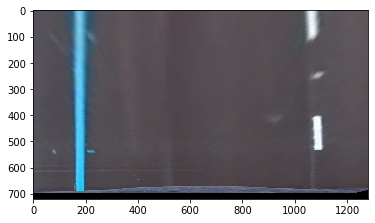

In [95]:
# src = np.float32([[350, 670], [547, 500], [799, 500], [1115, 670]])
src = np.float32([[350, 670], [581, 470], [719, 470], [1000, 670]])

min_x = int(imshape[1] * 0.20)
max_x = int(imshape[1] * 0.80)
min_y = int(imshape[0] * 0.07)
max_y = int(imshape[0] * 0.93)
dst = np.float32([[min_x, max_y], [min_x, min_y], [max_x, min_y], [max_x, max_y]])

M = cv2.getPerspectiveTransform(src, dst)

warped = cv2.warpPerspective(frames[500], M, imshape[1::-1])
plt.imshow(warped)

In [97]:
for frame in frames:
    warped = cv2.warpPerspective(frame, M, imshape[1::-1])
    cv2.imshow('img', warped)
    cv2.waitKey(33)

In [99]:
from moviepy.editor import VideoFileClip

In [103]:
def process_image(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return cv2.warpPerspective(undist, M, imshape[1::-1])


In [106]:
white_output = 'transform_chall.mp4'
clip1 = VideoFileClip("../challenge_video.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)

t:   1%|          | 6/485 [00:00<00:08, 57.73it/s, now=None]

Moviepy - Building video transform_chall.mp4.
Moviepy - Writing video transform_chall.mp4



Moviepy - Done !
Moviepy - video ready transform_chall.mp4
CPU times: user 19.4 s, sys: 2.59 s, total: 22 s
Wall time: 13.7 s


In [29]:
print(src)
print(dst)

[[ 670.  350.]
 [ 500.  500.]
 [ 500.  800.]
 [ 670. 1100.]]
[[ 669.   89.]
 [  50.   89.]
 [  50. 1190.]
 [ 669. 1190.]]


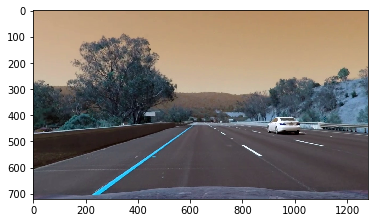

In [48]:
plt.imshow(frames[500])

## Use color transforms, gradients, etc., to create a thresholded binary image.

## Apply a perspective transform to rectify binary image ("birds-eye view").

In [ ]:
corners = corners.squeeze()
src = np.float32([corners[0], corners[7], corners[-8], corners[-1]])

In [9]:
i = cv2.imread("../../P2/warped_example.jpg")

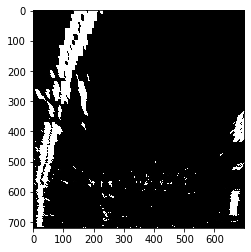

In [25]:
plt.imshow(i[:,300:1000])

In [ ]:
%matplotlib qt

In [17]:
%matplotlib inline

In [23]:
970 - 310

660